# Compartment 注释和比较
> 这个 git 同步之后在本地电脑分析，北极星的 lustre 系统不支持 sqlite3 的使用，在基因注释上会出问题

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [3]:
%precision 3
%matplotlib inline

## load table

In [3]:
df = pd.read_csv('tables/temp_table__compartment_score.csv')
df

# generate from analysis with GENOVA

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,ND6-DddAwt_rep1,ND6-DddAwt_rep2
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,0.400256,0.450538
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,0.398515,0.389346
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,0.466091,0.542282
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,0.553946,0.588033
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,0.554381,0.589109
...,...,...,...,...,...,...,...,...,...,...,...,...
30890,chrY,56900000,57000000,30891,0.660128,0.676778,0.574259,0.235568,0.042117,-0.000401,0.161206,0.293451
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,0.365008,0.428172
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,0.389410,-0.205455
30893,chrY,57200000,57227415,30894,0.320396,-0.053625,-0.280178,-0.111241,-0.398193,0.301994,0.427283,0.358151


## 两两比较的目标

In [4]:
ls_temp = []
ls_vs = []

for ctrl in df.columns[4:]:
    for treatment in df.columns[4:]:
        if ctrl == treatment:
            continue

        if (ctrl, treatment) in ls_temp or (treatment, ctrl) in ls_temp:
            continue

        ls_temp.append((ctrl, treatment))

        ls_vs.append((ctrl, treatment))
pd.DataFrame(ls_vs)

,0,1
0,GFP_rep3,SIRT6-DddA11_Dead_rep1
1,GFP_rep3,JAK2-DddA11_rep1
2,GFP_rep3,SIRT6-DddA11_rep1
3,GFP_rep3,GFP_rep1
4,GFP_rep3,GFP_rep2
5,GFP_rep3,ND6-DddAwt_rep1
6,GFP_rep3,ND6-DddAwt_rep2
7,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1
8,SIRT6-DddA11_Dead_rep1,SIRT6-DddA11_rep1
9,SIRT6-DddA11_Dead_rep1,GFP_rep1


In [5]:
def parse_compartment_convert(val, treat1, treat2):
    # ctrl = 'GFP_rep3'
    # treatment = 'SIRT6-DddA11_rep1'
    ctrl = treat1
    treatment = treat2

    if val[ctrl] > 0:
        if val[treatment] > 0:
            return 'A2A'
        elif val[treatment] < 0:
            return 'A2B'
        else:
            return np.NaN
    elif val[ctrl] < 0:
        if val[treatment] > 0:
            return 'B2A'
        elif val[treatment] < 0:
            return 'B2B'
        else:
            return np.NaN

In [6]:
dt_series = {}

for treat1, treat2 in ls_vs:
    dt_series[f'cps_{treat1}_{treat2}'] = df.apply(lambda x: parse_compartment_convert(x, treat1=treat1, treat2=treat2),
                                                   axis=1)

df_cps = pd.concat([df, pd.DataFrame(dt_series)], axis=1)
df_cps.head()

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_GFP_rep1,cps_SIRT6-DddA11_rep1_GFP_rep2,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A


In [11]:
def parse_compartment_convert_lzx(val):
    # print(val)
    # print(val[['GFP_rep1', 'GFP_rep2', 'ND6-DddAwt_rep1', 'ND6-DddAwt_rep2']])
    if np.NaN not in val[['GFP_rep1', 'GFP_rep2', 'ND6-DddAwt_rep1', 'ND6-DddAwt_rep2']]:
        if (val['GFP_rep1'] > 0 and val['GFP_rep2'] > 0) or (val['GFP_rep1'] + val['GFP_rep2'] > 0):
            if (val['ND6-DddAwt_rep1'] > 0 and val['ND6-DddAwt_rep2'] > 0) or (val['ND6-DddAwt_rep1'] + val['ND6-DddAwt_rep2'] > 0):
                return 'A2A'
            elif (val['ND6-DddAwt_rep1'] < 0 and val['ND6-DddAwt_rep2'] < 0) or (val['ND6-DddAwt_rep1'] + val['ND6-DddAwt_rep2'] < 0):
                return 'A2B'
            else:
                return np.NaN
        elif (val['GFP_rep1'] < 0 and val['GFP_rep2'] < 0) or (val['GFP_rep1'] + val['GFP_rep2'] < 0):
            if (val['ND6-DddAwt_rep1'] > 0 and val['ND6-DddAwt_rep2'] > 0) or (val['ND6-DddAwt_rep1'] + val['ND6-DddAwt_rep2'] > 0):
                return 'B2A'
            elif (val['ND6-DddAwt_rep1'] < 0 and val['ND6-DddAwt_rep2'] < 0) or (val['ND6-DddAwt_rep1'] + val['ND6-DddAwt_rep2'] < 0):
                return 'B2B'
            else:
                return np.NaN
        else:
            return np.NaN
    else:
            return np.NaN

In [12]:
df_cps.columns

Index(['chrom', 'start', 'end', 'bin', 'GFP_rep3', 'SIRT6-DddA11_Dead_rep1',
       'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1', 'GFP_rep1', 'GFP_rep2',
       'ND6-DddAwt_rep1', 'ND6-DddAwt_rep2',
       'cps_GFP_rep3_SIRT6-DddA11_Dead_rep1', 'cps_GFP_rep3_JAK2-DddA11_rep1',
       'cps_GFP_rep3_SIRT6-DddA11_rep1', 'cps_GFP_rep3_GFP_rep1',
       'cps_GFP_rep3_GFP_rep2', 'cps_GFP_rep3_ND6-DddAwt_rep1',
       'cps_GFP_rep3_ND6-DddAwt_rep2',
       'cps_SIRT6-DddA11_Dead_rep1_JAK2-DddA11_rep1',
       'cps_SIRT6-DddA11_Dead_rep1_SIRT6-DddA11_rep1',
       'cps_SIRT6-DddA11_Dead_rep1_GFP_rep1',
       'cps_SIRT6-DddA11_Dead_rep1_GFP_rep2',
       'cps_SIRT6-DddA11_Dead_rep1_ND6-DddAwt_rep1',
       'cps_SIRT6-DddA11_Dead_rep1_ND6-DddAwt_rep2',
       'cps_JAK2-DddA11_rep1_SIRT6-DddA11_rep1',
       'cps_JAK2-DddA11_rep1_GFP_rep1', 'cps_JAK2-DddA11_rep1_GFP_rep2',
       'cps_JAK2-DddA11_rep1_ND6-DddAwt_rep1',
       'cps_JAK2-DddA11_rep1_ND6-DddAwt_rep2',
       'cps_SIRT6-DddA11_rep1_GFP_r

In [14]:
def parse_compartment_convert_rxc(val):
    # print(val)
    # print(val[['GFP_rep1', 'GFP_rep2', 'ND6-DddAwt_rep1', 'ND6-DddAwt_rep2']])
    if np.NaN not in val[['GFP_rep3', 'SIRT6-DddA11_Dead_rep1', 'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1']]:
        if val['GFP_rep3'] > 0 and val[['SIRT6-DddA11_Dead_rep1', 'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1']].sum() > 0:
            return 'A2A'
        elif val['GFP_rep3'] > 0 and val[['SIRT6-DddA11_Dead_rep1', 'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1']].sum() < 0:
            return 'A2B'
        elif val['GFP_rep3'] < 0 and val[['SIRT6-DddA11_Dead_rep1', 'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1']].sum() > 0:
            return 'B2A'
        elif val['GFP_rep3'] < 0 and val[['SIRT6-DddA11_Dead_rep1', 'JAK2-DddA11_rep1', 'SIRT6-DddA11_rep1']].sum() < 0:
            return 'B2B'
        else:
            return np.NaN
    else:
            return np.NaN

In [16]:
df_cps['cps_Old_GFP_ND6-DddAwt'] = df_cps.apply(parse_compartment_convert_lzx, axis=1)

df_cps['cps_New_GFP_DddA11'] = df_cps.apply(parse_compartment_convert_rxc, axis=1)

In [17]:
df_cps

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30890,chrY,56900000,57000000,30891,0.660128,0.676778,0.574259,0.235568,0.042117,-0.000401,...,A2A,A2A,A2B,A2A,A2A,B2A,B2A,A2A,A2A,A2A
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A
30893,chrY,57200000,57227415,30894,0.320396,-0.053625,-0.280178,-0.111241,-0.398193,0.301994,...,B2A,B2A,B2A,B2A,B2A,A2A,A2A,A2A,B2A,A2B


## 两两比较的结果

In [18]:
df_cps['cps_GFP_rep3_SIRT6-DddA11_Dead_rep1'].notna()

0         True
1         True
2         True
3         True
4         True
         ...  
30890     True
30891     True
30892     True
30893     True
30894    False
Name: cps_GFP_rep3_SIRT6-DddA11_Dead_rep1, Length: 30895, dtype: bool

## 去掉 ABA 和 BAB样式的 single convertion

In [19]:
# 看一下筛选后的分布情况
print(df_cps.iloc[:, 4:8].head(2))
df_cps.iloc[:, 4:8].applymap(abs).sum(axis=1).describe()

   GFP_rep3  SIRT6-DddA11_Dead_rep1  JAK2-DddA11_rep1  SIRT6-DddA11_rep1
0  0.405996                0.355108          0.503871           0.398684
1  0.478287                0.373109          0.482181           0.412578


count    30895.000000
mean         1.718966
std          1.372473
min          0.000000
25%          0.622137
50%          1.503443
75%          2.498253
max         23.236128
dtype: float64

In [20]:
ctrl_compartments = df_cps['cps_GFP_rep3_SIRT6-DddA11_Dead_rep1'].str[0].to_list()
# ctrl_compartments

In [21]:
df_cps

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30890,chrY,56900000,57000000,30891,0.660128,0.676778,0.574259,0.235568,0.042117,-0.000401,...,A2A,A2A,A2B,A2A,A2A,B2A,B2A,A2A,A2A,A2A
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A
30893,chrY,57200000,57227415,30894,0.320396,-0.053625,-0.280178,-0.111241,-0.398193,0.301994,...,B2A,B2A,B2A,B2A,B2A,A2A,A2A,A2A,B2A,A2B


In [22]:
ls_single_convert_idx = []
last_compartment = None
attention = False

for idx, this_compartment in enumerate(ctrl_compartments):
    # print(this_compartment)
    if not this_compartment:
        # 空值直接去掉
        ls_single_convert_idx.append(idx)
        continue

    if not attention:
        if last_compartment is None:
            attention = False
        else:
            if last_compartment == this_compartment:
                attention = False
            else:
                attention = True
    else:
        if last_compartment == this_compartment:
            attention = False
        else:
            attention = True
            ls_single_convert_idx.append(idx - 1)

    last_compartment = this_compartment

# ls_single_convert_idx

In [23]:
df_cps.drop(index=ls_single_convert_idx, inplace=True)
df_cps

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30887,chrY,56600000,56700000,30888,0.387820,-0.246965,-0.698137,0.326909,0.587777,0.219815,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2B
30888,chrY,56700000,56800000,30889,0.264779,0.729629,0.081466,0.805145,-0.473574,-0.006202,...,A2A,A2A,B2B,B2A,B2A,B2A,B2A,A2A,B2A,A2A
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A


In [24]:
df_cps.isna().sum().sum()

0

In [25]:
# 看一下筛选后的分布情况
print(df_cps.iloc[:, 4:8].head(2))
df_cps.iloc[:, 4:8].applymap(abs).sum(axis=1).describe()

   GFP_rep3  SIRT6-DddA11_Dead_rep1  JAK2-DddA11_rep1  SIRT6-DddA11_rep1
0  0.405996                0.355108          0.503871           0.398684
1  0.478287                0.373109          0.482181           0.412578


count    2.849400e+04
mean     1.853199e+00
std      1.342811e+00
min      2.017158e-13
25%      8.091816e-01
50%      1.641602e+00
75%      2.600475e+00
max      2.323613e+01
dtype: float64

In [26]:
# 这个是 A2B A2B A2B类似这种的 bin 拿出来注释一下

# print(df_cps.iloc[:,12:15].head(2))
df_cps.iloc[:, 12:15].value_counts().reset_index()
# 这里需要筛完之后重新统计,然后注释看看

,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,cps_GFP_rep3_JAK2-DddA11_rep1,cps_GFP_rep3_SIRT6-DddA11_rep1,0
0,B2B,B2B,B2B,13280
1,A2A,A2A,A2A,12554
2,A2A,A2B,A2A,358
3,B2B,B2A,B2B,336
4,A2A,A2A,A2B,306
5,B2A,B2A,B2B,237
6,B2A,B2B,B2B,228
7,A2B,A2B,A2B,217
8,A2B,A2A,A2B,160
9,A2B,A2A,A2A,147


筛选前

![](https://p.ipic.vip/hft97z.png)

筛选后

![](https://p.ipic.vip/9744cn.png)

In [27]:
# # df_filter = df[df.iloc[:,4:-1].applymap(abs).sum(axis=1) != 0].copy()
df_filter = df_cps[df_cps.iloc[:, 4:8].applymap(abs).sum(axis=1) >= 0.1].copy()
df_filter

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30887,chrY,56600000,56700000,30888,0.387820,-0.246965,-0.698137,0.326909,0.587777,0.219815,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2B
30888,chrY,56700000,56800000,30889,0.264779,0.729629,0.081466,0.805145,-0.473574,-0.006202,...,A2A,A2A,B2B,B2A,B2A,B2A,B2A,A2A,B2A,A2A
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A


<Axes: >

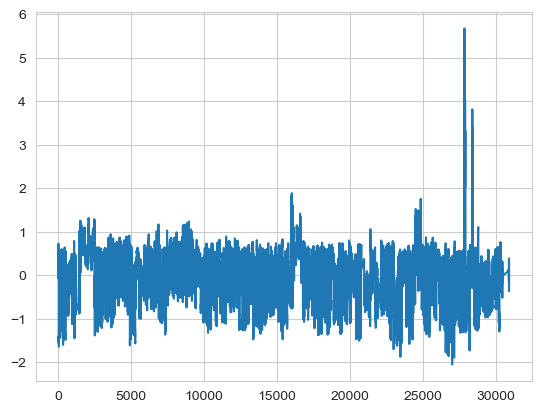

In [28]:
# use GFP_rep3 as ref compartment
df_filter['GFP_rep3'].plot()

In [29]:
sum(df_filter['GFP_rep3'] == 0)

0

## 筛选过后的Convert信息

In [30]:
df_cps_filter = df_filter.iloc[:, [0, 1, 2, 3] + list(range(12, 40, 1))].copy()
df_cps_filter

,chrom,start,end,bin,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,cps_GFP_rep3_JAK2-DddA11_rep1,cps_GFP_rep3_SIRT6-DddA11_rep1,cps_GFP_rep3_GFP_rep1,cps_GFP_rep3_GFP_rep2,cps_GFP_rep3_ND6-DddAwt_rep1,...,cps_SIRT6-DddA11_rep1_GFP_rep1,cps_SIRT6-DddA11_rep1_GFP_rep2,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2
0,chr1,0,100000,1,A2A,A2A,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,A2A,A2A,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,A2A,A2A,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,A2A,A2A,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,A2A,A2A,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30887,chrY,56600000,56700000,30888,A2B,A2B,A2A,A2A,A2A,A2A,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
30888,chrY,56700000,56800000,30889,A2A,A2A,A2A,A2B,A2B,A2A,...,A2B,A2B,A2A,A2A,B2B,B2A,B2A,B2A,B2A,A2A
30891,chrY,57000000,57100000,30892,B2B,B2B,B2A,B2B,B2A,B2A,...,A2B,A2A,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A
30892,chrY,57100000,57200000,30893,B2A,B2B,B2B,B2A,B2A,B2A,...,B2A,B2A,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B


## 绘制所有 Convert 比例

In [31]:
df_pies = df_filter.iloc[:, 12:].agg(pd.value_counts)
df_pies

,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,cps_GFP_rep3_JAK2-DddA11_rep1,cps_GFP_rep3_SIRT6-DddA11_rep1,cps_GFP_rep3_GFP_rep1,cps_GFP_rep3_GFP_rep2,cps_GFP_rep3_ND6-DddAwt_rep1,cps_GFP_rep3_ND6-DddAwt_rep2,cps_SIRT6-DddA11_Dead_rep1_JAK2-DddA11_rep1,cps_SIRT6-DddA11_Dead_rep1_SIRT6-DddA11_rep1,cps_SIRT6-DddA11_Dead_rep1_GFP_rep1,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
A2A,13235,13028,13042,12291,12416,12798,12706,13081,12998,12171,...,12627,12553,12717,12659,12600,12807,12718,13119,12740,13241
A2B,531,738,724,1475,1350,968,1060,742,825,1652,...,751,825,234,292,351,299,388,348,299,525
B2A,588,669,336,660,690,669,620,616,380,780,...,840,773,389,808,726,660,608,207,652,357
B2B,13695,13614,13947,13623,13593,13614,13663,13610,13846,13446,...,13831,13898,14709,14290,14372,14283,14335,14375,14358,13926


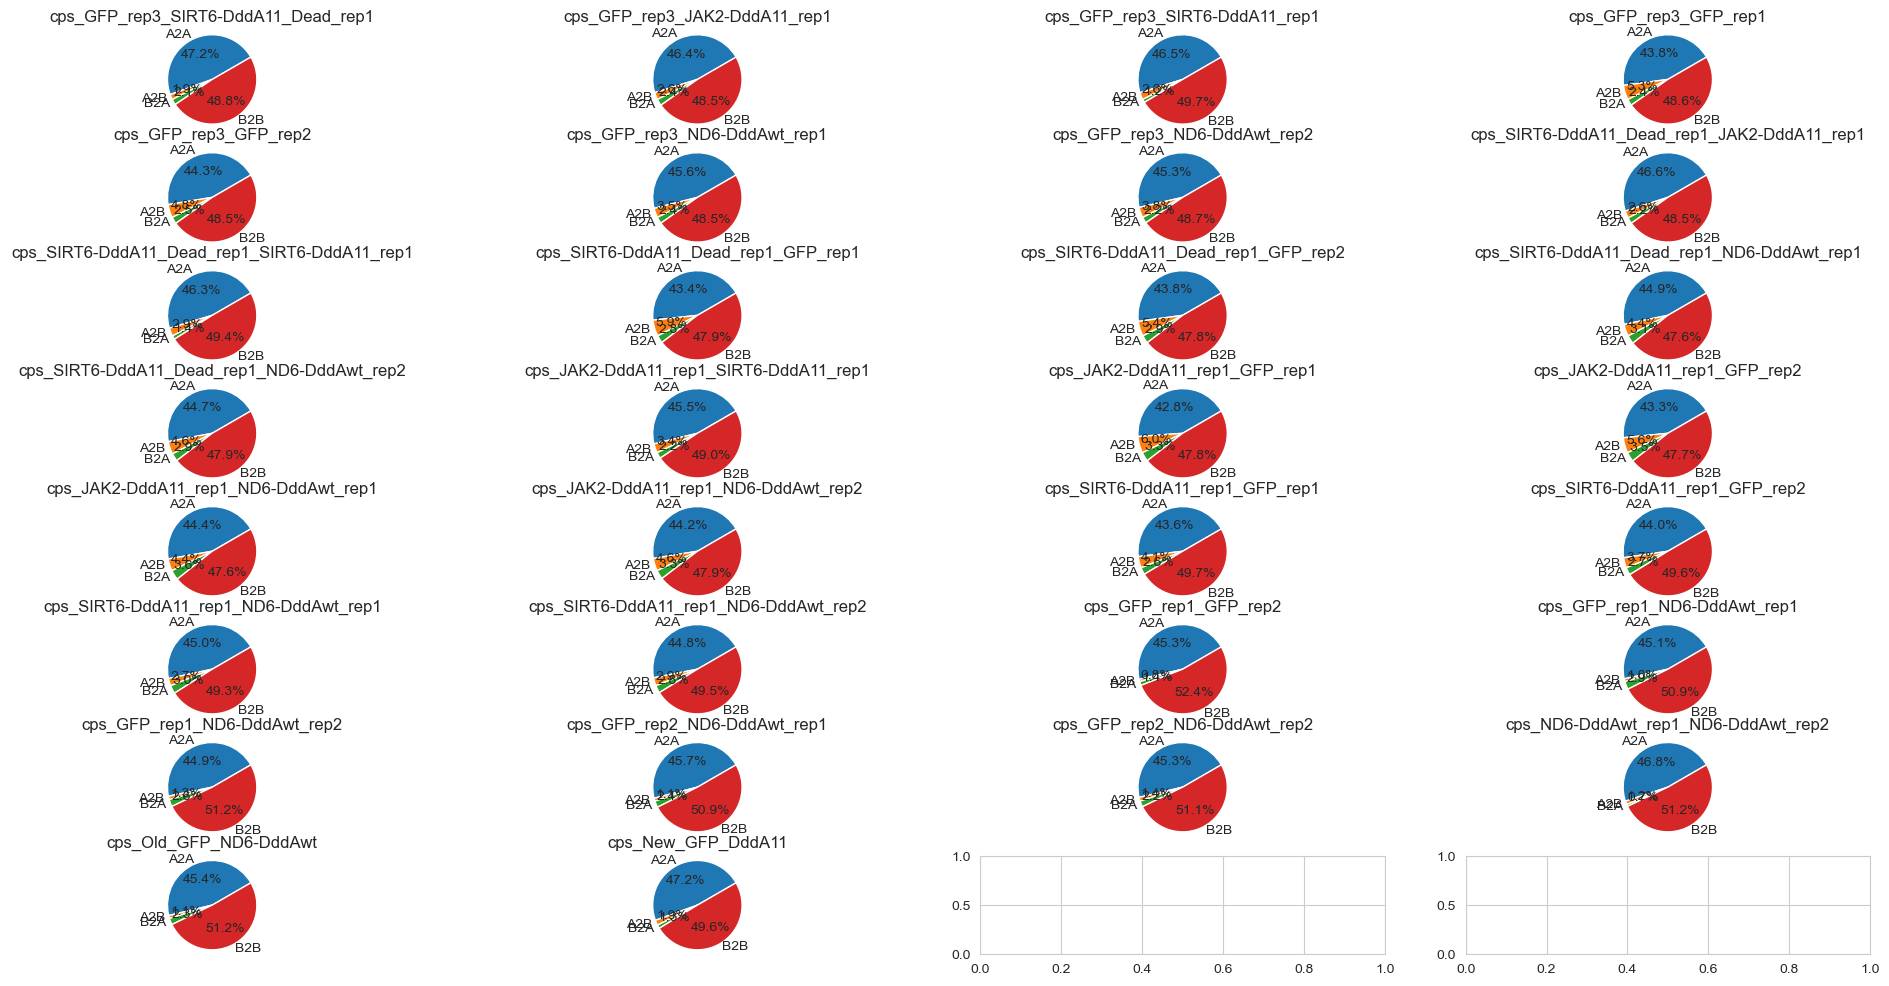

In [32]:
labels = df_pies.index
nrows = 8
ncols = 4
dxs = 3.0
dys = 3.0

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(dxs * nrows, dys * ncols))
explode = (0., 0., 0, 0)
row = 0
col = 0

for idx, col_name in enumerate(df_pies):
    col = idx % 4
    row = idx // 4
    # print(row, col)
    axes[row, col].pie(
        df_pies[col_name],
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=.6,
        labeldistance=1.1,
        shadow=False,
        startangle=30
    )
    axes[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[row, col].set_title(col_name)

# fig.tight_layout()                       # not strictly part of the question

# plt.show()

## 给出 conver 的基因 list

In [33]:
df_cps_final = df_filter
df_cps_final

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30887,chrY,56600000,56700000,30888,0.387820,-0.246965,-0.698137,0.326909,0.587777,0.219815,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2B
30888,chrY,56700000,56800000,30889,0.264779,0.729629,0.081466,0.805145,-0.473574,-0.006202,...,A2A,A2A,B2B,B2A,B2A,B2A,B2A,A2A,B2A,A2A
30891,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B
30892,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2A,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A


### 定义一个函数用来生成指定的差异基因 list

In [34]:
# pip install pyensembl
# https://github.com/openvax/pyensembl
# https://blog.csdn.net/jiangpeng59/article/details/83147236
# pyensembl -h
# pyensembl install --release 77 --species homo_sapiens
# release 77 use human reference genome GRCh38 (hg38)
import pyensembl as pe

# release 77 uses human reference genome GRCh38
data = pe.EnsemblRelease(77)

# will return ['HLA-A']
gene_names = data.gene_names_at_locus(contig=6, position=29945884)

# get all exons associated with HLA-A
exon_ids = data.exon_ids_of_gene_name('HLA-A')
print(exon_ids[:10])

gene_names = data.gene_names_at_locus(contig='1', position=100000, end=200000)
print(gene_names)

['ENSE00001677386', 'ENSE00001617475', 'ENSE00001633002', 'ENSE00001709288', 'ENSE00001681031', 'ENSE00003617747', 'ENSE00003518731', 'ENSE00003618247', 'ENSE00003515521', 'ENSE00003648072']
['CICP27', 'FO538757.2', 'FO538757.3', 'MIR6859-1', 'RNU6-1100P', 'RP11-34P13.13', 'RP11-34P13.14', 'RP11-34P13.15', 'RP11-34P13.16', 'RP11-34P13.7', 'RP11-34P13.9']


In [35]:
def get_gene_set_from_cps(df_cps, aim_cps_col, cp_direct='A2B'):
    """

    :param df_cps: df_cps dataframe
    :param aim_cps_col: 需要比较的列, 如cps_GFP_rep3_SIRT6-DddA11_Dead_rep1
    :param cp_direct:  A2B or B2A
    :return: gene_id list
    """
    set_cp = set()
    # print(f'{aim_cps_col}=="{cp_direct}"')

    for idx, row_info in df_cps.query(f'`{aim_cps_col}`=="{cp_direct}"')[['chrom', 'start', 'end']].iterrows():
        chrom, start, end = row_info
        chrom = chrom.replace('chr', '')
        # gene_names = data.gene_names_at_locus(contig=chrom, position=start, end=end)
        gene_objs = data.genes_at_locus(contig=chrom, position=start, end=end)
        gene_ids = [gene_obj.gene_id for gene_obj in gene_objs]
        # print(gene_ids)
        set_cp.update(gene_ids)
        ls_cp = sorted(list(set_cp))
    return ls_cp

In [36]:
df_cps_final.head()

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep1,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
1,chr1,100000,200000,2,0.478287,0.373109,0.482181,0.412578,0.416413,0.431945,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
2,chr1,200000,300000,3,0.442173,0.397489,0.509553,0.441876,0.388771,0.526156,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
3,chr1,300000,400000,4,0.443840,0.447102,0.541957,0.478203,0.539146,0.522830,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A
4,chr1,400000,500000,5,0.443726,0.447444,0.539913,0.479331,0.538317,0.523794,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A


In [37]:
# df_cps_final
df_anno = pd.read_csv('tables/hg38_ucsc_refseq_whole-gene.bed.gz', sep='\t', comment='#', header=None).iloc[:,[0, 1, 2, 3]]
df_anno.head()
# pd.read_csv?

,0,1,2,3
0,chr1,67092164,67109072,XM_011541469.2
1,chr1,67092164,67131227,XM_017001276.2
2,chr1,67092164,67131227,XM_011541467.2
3,chr1,67092164,67134970,NM_001276352.2
4,chr1,67092164,67134970,NM_001276351.2


In [38]:
from pybedtools import BedTool

In [39]:
# bed_df_cps_final = BedTool(df_cps_final.iloc[:,[0, 1, 2, 3]])
# # bed_df_cps_final
# bed_df_anno = BedTool(df_anno.iloc[:,[0, 1, 2, 3]])
# # bed_df_anno

# bed_df_cps_final.intersect(bed_df_anno, loj=True).to_dataframe()


# bedtools intersect -a stdin -loj -b

df_cps_final.to_csv('test_bed1.bed', sep='\t', header=False, index=False)
df_anno.to_csv('test_bed2.bed', sep='\t', header=False, index=False)

In [40]:
!bedtools intersect -a test_bed1.bed -loj -b test_bed2.bed > tables/intersect_info.tsv

In [41]:
!rm test_bed1.bed && rm test_bed2.bed

In [42]:
df_intersect = pd.read_csv('tables/intersect_info.tsv', sep='\t', header=None)
df_intersect.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,chr1,11873,14409,NR_046018.2
1,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,chr1,17368,17436,NR_106918.1
2,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,chr1,30365,30503,NR_036051.1
3,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,chr1,34610,36081,NR_026818.1
4,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,chr1,14361,29370,NR_024540.1


In [43]:
df_intersect_sel = df_intersect.iloc[:,[0, 1, 2, 42, 43, 44]].copy()
df_intersect_sel.head()

,0,1,2,42,43,44
0,chr1,0,100000,chr1,11873,14409
1,chr1,0,100000,chr1,17368,17436
2,chr1,0,100000,chr1,30365,30503
3,chr1,0,100000,chr1,34610,36081
4,chr1,0,100000,chr1,14361,29370


In [49]:
df_intersect_sel_rmna = df_intersect_sel[df_intersect_sel.iloc[:,3] != -1].copy()
df_refseqid = df_intersect_sel_rmna.iloc[:,[0, 1, 2, -1]].copy()
df_refseqid.columns = ['chrom', 'start', 'end', 'gene_id']
df_refseqid = df_refseqid.drop_duplicates(subset='gene_id')
df_refseqid['gene_id'] = df_refseqid['gene_id'].str.split('.').str[0]
df_refseqid

AttributeError: Can only use .str accessor with string values!

In [45]:
df_cps_final = df_cps_final.merge(df_refseqid, on=['chrom', 'start', 'end'], how='left')
df_cps_final

,chrom,start,end,bin,GFP_rep3,SIRT6-DddA11_Dead_rep1,JAK2-DddA11_rep1,SIRT6-DddA11_rep1,GFP_rep1,GFP_rep2,...,cps_SIRT6-DddA11_rep1_ND6-DddAwt_rep2,cps_GFP_rep1_GFP_rep2,cps_GFP_rep1_ND6-DddAwt_rep1,cps_GFP_rep1_ND6-DddAwt_rep2,cps_GFP_rep2_ND6-DddAwt_rep1,cps_GFP_rep2_ND6-DddAwt_rep2,cps_ND6-DddAwt_rep1_ND6-DddAwt_rep2,cps_Old_GFP_ND6-DddAwt,cps_New_GFP_DddA11,gene_id
0,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,14409.0
1,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,17436.0
2,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,30503.0
3,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,36081.0
4,chr1,0,100000,1,0.405996,0.355108,0.503871,0.398684,0.329703,0.422206,...,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,A2A,29370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73554,chrY,57000000,57100000,30892,-0.050653,-0.253744,-0.529894,0.718443,-0.113220,0.127391,...,A2A,B2A,B2A,B2A,A2A,A2A,A2A,A2A,B2B,57130289.0
73555,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A,57197337.0
73556,chrY,57100000,57200000,30893,-0.365184,0.209018,-0.004564,-0.112983,0.448523,0.316222,...,B2B,A2A,A2A,A2B,A2A,A2B,A2B,A2A,B2A,57197869.0
73557,chrY,57200000,57227415,30894,0.320396,-0.053625,-0.280178,-0.111241,-0.398193,0.301994,...,B2A,B2A,B2A,B2A,A2A,A2A,A2A,B2A,A2B,57203350.0


In [46]:
with open('test_refseqid_A2B.txt', 'wt') as f:
    f.write('\n'.join(list(set(df_cps_final.loc[(df_cps_final['cps_Old_GFP_ND6-DddAwt'] == 'A2B') & (df_cps_final['gene_id'].notna()), 'gene_id'].to_list()))) + '\n')


with open('test_refseqid_B2A.txt', 'wt') as f:
    f.write('\n'.join(list(set(df_cps_final.loc[(df_cps_final['cps_Old_GFP_ND6-DddAwt'] == 'B2A') & (df_cps_final['gene_id'].notna()), 'gene_id'].to_list()))) + '\n')

TypeError: sequence item 0: expected str instance, float found

In [47]:
ls_dfs = []

for cps in df_cps_final.filter(like='cps_', axis=1).columns:
    df_A2B = pd.Series(
        get_gene_set_from_cps(df_cps=df_cps_final, aim_cps_col=cps, cp_direct='A2B'),
        name='gene_id'
    ).to_frame().assign(cluster=f'{cps}_A2B')
    df_B2A = pd.Series(
        get_gene_set_from_cps(df_cps=df_cps_final, aim_cps_col=cps, cp_direct='B2A'),
        name='gene_id'
    ).to_frame().assign(cluster=f'{cps}_B2A')
    ls_dfs.append(df_A2B)
    ls_dfs.append(df_B2A)

In [50]:
df = pd.concat(ls_dfs, axis=0)
df

,gene_id,cluster
0,ENSG00000002586,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1_A2B
1,ENSG00000005421,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1_A2B
2,ENSG00000007001,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1_A2B
3,ENSG00000012211,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1_A2B
4,ENSG00000012660,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1_A2B
...,...,...
899,ENSG00000280202,cps_New_GFP_DddA11_B2A
900,ENSG00000280209,cps_New_GFP_DddA11_B2A
901,ENSG00000280256,cps_New_GFP_DddA11_B2A
902,ENSG00000280258,cps_New_GFP_DddA11_B2A


In [51]:
df['sample'] = df['cluster'].str[:-4]
df['convertion'] = df['cluster'].str[-3:]
df.drop(columns='cluster', inplace=True)
df

,gene_id,sample,convertion
0,ENSG00000002586,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
1,ENSG00000005421,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
2,ENSG00000007001,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
3,ENSG00000012211,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
4,ENSG00000012660,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
...,...,...,...
899,ENSG00000280202,cps_New_GFP_DddA11,B2A
900,ENSG00000280209,cps_New_GFP_DddA11,B2A
901,ENSG00000280256,cps_New_GFP_DddA11,B2A
902,ENSG00000280258,cps_New_GFP_DddA11,B2A


In [52]:
df_cps_final[['cps_Old_GFP_ND6-DddAwt', 'gene_id']]

,cps_Old_GFP_ND6-DddAwt,gene_id
0,A2A,14409.0
1,A2A,17436.0
2,A2A,30503.0
3,A2A,36081.0
4,A2A,29370.0
...,...,...
73554,A2A,57130289.0
73555,A2A,57197337.0
73556,A2A,57197869.0
73557,B2A,57203350.0


In [53]:
from lets_plot import *

LetsPlot.setup_html()

### 查看不同样本间 A/B的变化数量特征

In [54]:
g = ggplot(data=df) + ggsize(1000, 600)
g += geom_bar(mapping=aes(x='sample',fill='convertion'), position='dodge')
g += ggtitle('A2B and B2A count per sample')
# g += theme(axis_text_x=element_text(angle = -90, hjust = 0))
g

In [55]:
ggsave(g, 'figures/compartment_annotation.A2B_and_B2A_count_per_sample.svg', path='.', iframe=False)

'/Volumes/zhaohn_HD/NCloud/Scientific_research/2022_DdCBE-3D-Genome_topic/snakepipes_Hi-C/figures/compartment_annotation.A2B_and_B2A_count_per_sample.svg'

## 拿到 差异基因 df /list

In [56]:
df

,gene_id,sample,convertion
0,ENSG00000002586,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
1,ENSG00000005421,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
2,ENSG00000007001,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
3,ENSG00000012211,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
4,ENSG00000012660,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
...,...,...,...
899,ENSG00000280202,cps_New_GFP_DddA11,B2A
900,ENSG00000280209,cps_New_GFP_DddA11,B2A
901,ENSG00000280256,cps_New_GFP_DddA11,B2A
902,ENSG00000280258,cps_New_GFP_DddA11,B2A


In [57]:
df.to_csv('tables/compartment_annotation_AB_convertion_info.csv', header=True, index=False)

In [58]:
import os

os.makedirs('tables/compartment_annotation_lists', exist_ok=True)

In [59]:
df = pd.read_csv('tables/compartment_annotation_AB_convertion_info.csv')
df.head()

,gene_id,sample,convertion
0,ENSG00000002586,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
1,ENSG00000005421,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
2,ENSG00000007001,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
3,ENSG00000012211,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B
4,ENSG00000012660,cps_GFP_rep3_SIRT6-DddA11_Dead_rep1,A2B


In [60]:
for idx, _df in df.groupby(['sample', 'convertion']):
    cps, convertion = idx

    _df['gene_id'].to_csv(f'tables/compartment_annotation_lists/{cps}_{convertion}.txt', index=False, header=False)

# Use R ClusterProfiler to do **enrichment analysis**

> https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-go.html

```
micromamba install -c bioconda bioconductor-clusterprofiler bioconductor-org.hs.eg.db
```

## Terminology / Background

### Gene sets and pathway
A gene set is an unordered collection of genes that are functionally related. A pathway can be interpreted as a gene set by ignoring functional relationships among genes.

### Gene Ontology (GO)
Gene Ontology defines concepts/classes used to describe gene function, and relationships between these concepts. It classifies functions along three aspects:

- MF: Molecular Function: molecular activities of gene products
- CC: Cellular Component: where gene products are active
- BP: Biological Process: pathways and larger processes made up of the activities of multiple gene products

GO terms are organized in a directed acyclic graph, where edges between terms represent parent-child relationship.

### Kyoto Encyclopedia of Genes and Genomes (KEGG)
KEGG is a collection of manually drawn pathway maps representing molecular interaction and reaction networks. These pathways cover a wide range of biochemical processes that can be divided into 7 broad categories:
1. Metabolism
2. Genetic information processing
3. Environmental information processing
4. Cellular processes
5. Organismal systems
6. Human diseases
7. Drug development

### Other gene sets
GO and KEGG are the most frequently used for functional analysis. They are typically the first choice because of their long-standing curation and availability for a wide range of species.

Other gene sets include but are not limited to Disease Ontology (DO), Disease Gene Network (DisGeNET), wikiPathways, Molecular Signatures Database (MSigDb).

### Over Representation Analysis
Over Representation Analysis (ORA) (Boyle et al. 2004) is a widely used approach to determine whether known biological functions or processes are over-represented (= enriched) in an experimentally-derived gene list, e.g. a list of differentially expressed genes (DEGs).

The p-value can be calculated by hypergeometric distribution.


$$ p = 1 - \displaystyle\sum_{i = 0}^{k-1}\frac{{M \choose i}{{N-M} \choose {n-i}}} {{N \choose n}} $$


In this equation, N is the total number of genes in the background distribution, M is the number of genes within that distribution that are annotated (either directly or indirectly) to the gene set of interest, n is the size of the list of genes of interest and k is the number of genes within that list which are annotated to the gene set. The background distribution by default is all the genes that have annotation. P-values should be adjusted for multiple comparison.

Example: Suppose we have 17,980 genes detected in a Microarray study and 57 genes were differentially expressed. Among the differentially expressed genes, 28 are annotated to a gene set.

```R
d <- data.frame(gene.not.interest=c(2613, 15310), gene.in.interest=c(28, 29))
row.names(d) <- c("In_category", "not_in_category")
d

##                 gene.not.interest gene.in.interest
## In_category                  2613               28
## not_in_category             15310               29
```

Whether the overlap(s) of 25 genes are significantly over represented in the gene set can be assessed using a hypergeometric distribution. This corresponds to a one-sided version of Fisher’s exact test.

```R
fisher.test(d, alternative = "greater")
## 
##  Fisher's Exact Test for Count Data
## 
## data:  d
## p-value = 1
## alternative hypothesis: true odds ratio is greater than 1
## 95 percent confidence interval:
##  0.110242      Inf
## sample estimates:
## odds ratio 
##  0.1767937
```

### Gene Set Enrichment Analysis
A common approach to analyzing gene expression profiles is identifying differentially expressed genes that are deemed interesting. The ORA enrichment analysis is based on these differentially expressed genes. This approach will find genes where the difference is large and will fail where the difference is small, but evidenced in coordinated way in a set of related genes. Gene Set Enrichment Analysis (GSEA)(Subramanian et al. 2005) directly addresses this limitation. All genes can be used in GSEA; GSEA aggregates the per gene statistics across genes within a gene set, therefore making it possible to detect situations where all genes in a predefined set change in a small but coordinated way. This is important since it is likely that many relevant phenotypic differences are manifested by small but consistent changes in a set of genes.

Genes are ranked based on their phenotypes. Given apriori defined set of gene S (e.g., genes sharing the same DO category), the goal of GSEA is to determine whether the members of S are randomly distributed throughout the ranked gene list (L) or primarily found at the top or bottom.

There are three key elements of the GSEA method:

- Calculation of an Enrichment Score.

The enrichment score (ES) represents the degree to which a set S is over-represented at the top or bottom of the ranked list L. The score is calculated by walking down the list L, increasing a running-sum statistic when we encounter a gene in S and decreasing when it is not encountered. The magnitude of the increment depends on the gene statistics (e.g., correlation of the gene with phenotype). The ES is the maximum deviation from zero encountered in the random walk; it corresponds to a weighted Kolmogorov-Smirnov(KS)-like statistic (Subramanian et al. 2005).

- Esimation of Significance Level of ES.

The p-value of the ES is calculated using a permutation test. Specifically, we permute the gene labels of the gene list L and recompute the ES of the gene set for the permutated data, which generate a null distribution for the ES. The p-value of the observed ES is then calculated relative to this null distribution.

- Adjustment for Multiple Hypothesis Testing.

When the entire gene sets are evaluated, the estimated significance level is adjusted to account for multiple hypothesis testing and also q-values are calculated for FDR control.
We implemented the GSEA algorithm proposed by Subramanian (Subramanian et al. 2005). Alexey Sergushichev implemented an algorithm for fast GSEA calculation in the fgsea (Korotkevich, Sukhov, and Sergushichev 2019) package. In our packages (clusterProfiler, DOSE, meshes and ReactomePA), users can use the GSEA algorithm implemented in DOSE or fgsea by specifying the parameter by="DOSE" or by="fgsea". By default, the fgsea method will be used since it is much more faster.

### Leading edge analysis and core enriched genes
Leading edge analysis reports Tags to indicate the percentage of genes contributing to the enrichment score, List to indicate where in the list the enrichment score is attained and Signal for enrichment signal strength.

It would also be very interesting to get the core enriched genes that contribute to the enrichment. 

Our packages (clusterProfiler, DOSE, meshes and ReactomePA) support leading edge analysis and report core enriched genes in GSEA analysis.

## Description for GO enrichment analysis
GO comprises three orthogonal ontologies, i.e. molecular function (MF), biological process (BP), and cellular component (CC).

### Supported organisms
GO analyses (groupGO(), enrichGO() and gseGO()) support organisms that have an OrgDb object available (see also session 2.2).

If a user has GO annotation data (in a data.frame format with the first column as gene ID and the second column as GO ID), they can use the enricher() and GSEA() functions to perform an over-representation test and gene set enrichment analysis.

If the genes are annotated by direction annotation, they should also be annotated by their ancestor GO nodes (indirect annotation). If a user only has direct annotation, they can pass their annotation to the buildGOmap function, which will infer indirect annotation and generate a data.frame that is suitable for both enricher() and GSEA().

### GO classification
In clusterProfiler, the groupGO() function is designed for gene classification based on GO distribution at a specific level. Here we use the dataset geneList provided by DOSE.

```R
library(clusterProfiler)
data(geneList, package="DOSE")
gene <- names(geneList)[abs(geneList) > 2]

# Entrez gene ID
head(gene)
## [1] "4312"  "8318"  "10874" "55143" "55388" "991"

ggo <- groupGO(gene     = gene,
               OrgDb    = org.Hs.eg.db,
               ont      = "CC",
               level    = 3,
               readable = TRUE)

head(ggo)
##                    ID                Description Count GeneRatio geneID
## GO:0000133 GO:0000133                 polarisome     0     0/207       
## GO:0000408 GO:0000408          EKC/KEOPS complex     0     0/207       
## GO:0000417 GO:0000417                HIR complex     0     0/207       
## GO:0000444 GO:0000444    MIS12/MIND type complex     0     0/207       
## GO:0000808 GO:0000808 origin recognition complex     0     0/207       
## GO:0000930 GO:0000930      gamma-tubulin complex     0     0/207
```

The gene parameter is a vector of gene IDs (can be any ID type that is supported by the corresponding OrgDb, see also session 16.1). If readable is set to TRUE, the input gene IDs will be converted to gene symbols.

### GO over-representation analysis
The clusterProfiler package implements enrichGO() for gene ontology over-representation test.

```R
ego <- enrichGO(gene          = gene,
                universe      = names(geneList),
                OrgDb         = org.Hs.eg.db,
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)
head(ego)
##                    ID                              Description GeneRatio
## GO:0005819 GO:0005819                                  spindle    26/201
## GO:0000779 GO:0000779 condensed chromosome, centromeric region    16/201
## GO:0072686 GO:0072686                          mitotic spindle    17/201
## GO:0000775 GO:0000775           chromosome, centromeric region    18/201
## GO:0098687 GO:0098687                       chromosomal region    23/201
## GO:0000776 GO:0000776                              kinetochore    15/201
##              BgRatio       pvalue     p.adjust       qvalue
## GO:0005819 306/11853 1.072029e-11 3.151766e-09 2.888837e-09
## GO:0000779 114/11853 7.709944e-11 8.659125e-09 7.936756e-09
## GO:0072686 133/11853 8.835841e-11 8.659125e-09 7.936756e-09
## GO:0000775 158/11853 1.684987e-10 1.179661e-08 1.081250e-08
## GO:0098687 272/11853 2.006225e-10 1.179661e-08 1.081250e-08
## GO:0000776 106/11853 2.733425e-10 1.339378e-08 1.227644e-08
##                                                                                                                                                               geneID
## GO:0005819 CDCA8/CDC20/KIF23/CENPE/ASPM/DLGAP5/SKA1/NUSAP1/TPX2/TACC3/NEK2/CDK1/MAD2L1/KIF18A/BIRC5/KIF11/TRAT1/TTK/AURKB/PRC1/KIFC1/KIF18B/KIF20A/AURKA/CCNB1/KIF4A
## GO:0000779                                                             CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/NCAPG/AURKB/CCNB1
## GO:0072686                                                      KIF23/CENPE/ASPM/SKA1/NUSAP1/TPX2/TACC3/CDK1/MAD2L1/KIF18A/KIF11/TRAT1/AURKB/PRC1/KIFC1/KIF18B/AURKA
## GO:0000775                                                 CDCA8/CENPE/NDC80/TOP2A/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/NCAPG/AURKB/CCNB1
## GO:0098687                   CDCA8/CENPE/NDC80/TOP2A/HJURP/SKA1/NEK2/CENPM/RAD51AP1/CENPN/CDK1/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/EZH2/TTK/NCAPG/AURKB/CHEK1/CCNB1/MCM5
## GO:0000776                                                                   CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/AURKB/CCNB1
##            Count
## GO:0005819    26
## GO:0000779    16
## GO:0072686    17
## GO:0000775    18
## GO:0098687    23
## GO:0000776    15
```

Any gene ID type that is supported in OrgDb can be directly used in GO analyses. Users need to specify the keyType parameter to specify the input gene ID type.


```R
gene.df <- bitr(gene, fromType = "ENTREZID",
        toType = c("ENSEMBL", "SYMBOL"),
        OrgDb = org.Hs.eg.db)

ego2 <- enrichGO(gene         = gene.df$ENSEMBL,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)
head(ego2, 3)           
##                    ID                              Description GeneRatio
## GO:0005819 GO:0005819                                  spindle    30/233
## GO:0072686 GO:0072686                          mitotic spindle    21/233
## GO:0000779 GO:0000779 condensed chromosome, centromeric region    17/233
##              BgRatio       pvalue     p.adjust       qvalue
## GO:0005819 422/21916 1.954166e-16 5.413039e-14 4.175744e-14
## GO:0072686 179/21916 3.911063e-16 5.416822e-14 4.178662e-14
## GO:0000779 154/21916 7.525516e-13 6.948560e-11 5.360280e-11
##                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     geneID
## GO:0005819 ENSG00000134690/ENSG00000117399/ENSG00000137807/ENSG00000138778/ENSG00000066279/ENSG00000126787/ENSG00000154839/ENSG00000262634/ENSG00000137804/ENSG00000088325/ENSG00000013810/ENSG00000117650/ENSG00000170312/ENSG00000164109/ENSG00000121621/ENSG00000089685/ENSG00000138160/ENSG00000163519/ENSG00000112742/ENSG00000178999/ENSG00000198901/ENSG00000237649/ENSG00000233450/ENSG00000056678/ENSG00000204197/ENSG00000186185/ENSG00000112984/ENSG00000087586/ENSG00000134057/ENSG00000090889
## GO:0072686                                                                                                                                                 ENSG00000137807/ENSG00000138778/ENSG00000066279/ENSG00000154839/ENSG00000262634/ENSG00000137804/ENSG00000088325/ENSG00000013810/ENSG00000170312/ENSG00000164109/ENSG00000121621/ENSG00000138160/ENSG00000163519/ENSG00000178999/ENSG00000198901/ENSG00000237649/ENSG00000233450/ENSG00000056678/ENSG00000204197/ENSG00000186185/ENSG00000087586
## GO:0000779                                                                                                                                                                                                                 ENSG00000138778/ENSG00000080986/ENSG00000123485/ENSG00000154839/ENSG00000262634/ENSG00000117650/ENSG00000100162/ENSG00000166451/ENSG00000186871/ENSG00000164109/ENSG00000121621/ENSG00000167513/ENSG00000089685/ENSG00000112742/ENSG00000109805/ENSG00000178999/ENSG00000134057
##            Count
## GO:0005819    30
## GO:0072686    21
## GO:0000779    17
```

Gene IDs can be mapped to gene Symbols by using the parameter readable=TRUE or setReadable() function.

### GO Gene Set Enrichment Analysis
The clusterProfiler package provides the gseGO() function for gene set enrichment analysis using gene ontology.


```R
ego3 <- gseGO(geneList     = geneList,
              OrgDb        = org.Hs.eg.db,
              ont          = "CC",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)
```

The format of input data, geneList, was documented in the FAQ. Beware that only gene Set size in [minGSSize, maxGSSize] will be tested.

### GO analysis for non-model organisms
Both the enrichGO() and gseGO() functions require an OrgDb object as the background annotation. For organisms that don’t have OrgDb provided by Bioconductor, users can query one (if available) online via AnnotationHub. If there is no OrgDb available, users can obtain GO annotation from other sources, e.g. from biomaRt or Blast2GO. Then the enricher() or GSEA() functions can be used to perform GO analysis for these organisms, similar to the examples using wikiPathways and MSigDB. Another solution is to create an OrgDb on your own using AnnotationForge package.

### Visualize enriched GO terms as a directed acyclic graph

The goplot() function can accept the output of enrichGO and visualize the enriched GO induced graph.

```R
goplot(ego)
```

![](https://p.ipic.vip/sya8li.jpg)

In [ ]:
# goplot(ego)
# ego

### Summary
GO semantic similarity can be calculated by GOSemSim (Yu et al. 2010). We can use it to cluster genes/proteins into different clusters based on their functional similarity and can also use it to measure the similarities among GO terms to reduce the redundancy of GO enrichment results.

## My GO enrichment analysis

In [1]:
library(tidyverse)
library(clusterProfiler)
library(org.Hs.eg.db)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


clusterProfiler v4.6.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in publish

In [2]:
fpathes <- list.files('tables/compartment_annotation_lists/', full.names=T)
# print(fpathes[1:5])
print(fpathes)

 [1] "tables/compartment_annotation_lists//cps_GFP_rep1_GFP_rep2_A2B.txt"                       
 [2] "tables/compartment_annotation_lists//cps_GFP_rep1_GFP_rep2_B2A.txt"                       
 [3] "tables/compartment_annotation_lists//cps_GFP_rep1_ND6-DddAwt_rep1_A2B.txt"                
 [4] "tables/compartment_annotation_lists//cps_GFP_rep1_ND6-DddAwt_rep1_B2A.txt"                
 [5] "tables/compartment_annotation_lists//cps_GFP_rep1_ND6-DddAwt_rep2_A2B.txt"                
 [6] "tables/compartment_annotation_lists//cps_GFP_rep1_ND6-DddAwt_rep2_B2A.txt"                
 [7] "tables/compartment_annotation_lists//cps_GFP_rep2_ND6-DddAwt_rep1_A2B.txt"                
 [8] "tables/compartment_annotation_lists//cps_GFP_rep2_ND6-DddAwt_rep1_B2A.txt"                
 [9] "tables/compartment_annotation_lists//cps_GFP_rep2_ND6-DddAwt_rep2_A2B.txt"                
[10] "tables/compartment_annotation_lists//cps_GFP_rep2_ND6-DddAwt_rep2_B2A.txt"                
[11] "tables/compartment_annot

In [11]:
fpath <- fpathes[38]
fpath

[1] "tables/compartment_annotation_lists//cps_New_GFP_DddA11_B2A.txt"

In [12]:
gene <- as.character(as_vector(read_csv(fpath, col_names=F)))
head(gene)

genes_all_types <- bitr(
    gene, 
    fromType="ENSEMBL", 
    toType=c(
        "ENTREZID",
        "ENSEMBL",
        "SYMBOL"
    ), 
    OrgDb="org.Hs.eg.db"
)
head(genes_all_types)

Rows: 904 Columns: 1
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ENSG00000000005" "ENSG00000009694" "ENSG00000009709" "ENSG00000019102"
[5] "ENSG00000028116" "ENSG00000038219"

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(gene, fromType = "ENSEMBL", toType = c("ENTREZID", "ENSEMBL", :
“37.17% of input gene IDs are fail to map...”


,ENSEMBL,ENTREZID,SYMBOL
,<chr>,<chr>,<chr>
1,ENSG00000000005,64102,TNMD
2,ENSG00000009694,10178,TENM1
3,ENSG00000009709,5081,PAX7
4,ENSG00000019102,23584,VSIG2
5,ENSG00000028116,7444,VRK2
6,ENSG00000038219,259282,BOD1L1


In [13]:
# fpath <- 'test_refseqid_A2B.txt'
# gene <- as.character(as_vector(read_csv(fpath, col_names=F)))
# head(gene)

# genes_all_types <- bitr(
#     gene, 
#     fromType="REFSEQ", 
#     toType=c(
#         "ENTREZID",
#         "ENSEMBL",
#         "SYMBOL"
#     ), 
#     OrgDb="org.Hs.eg.db"
# )
# head(genes_all_types)


# goALL <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.5, keyType='SYMBOL')
# head(goALL)



# # dotplot(goALL, showCategory=20)#气泡图

# dotplot(goALL, split="ONTOLOGY")+ facet_grid(ONTOLOGY~.,scale="free")

In [14]:
# fpath <- 'test_refseqid_B2A.txt'
# gene <- as.character(as_vector(read_csv(fpath, col_names=F)))
# head(gene)

# genes_all_types <- bitr(
#     gene, 
#     fromType="REFSEQ", 
#     toType=c(
#         "ENTREZID",
#         "ENSEMBL",
#         "SYMBOL"
#     ), 
#     OrgDb="org.Hs.eg.db"
# )
# head(genes_all_types)


# goALL <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.5, keyType='SYMBOL')
# head(goALL)



# # dotplot(goALL, showCategory=20)#气泡图

# dotplot(goALL, split="ONTOLOGY")+ facet_grid(ONTOLOGY~.,scale="free")

In [15]:
# molecular function (MF), biological process (BP), and cellular component (CC).

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0045109,BP,GO:0045109,intermediate filament organization,10/326,69/18903,2.800727e-07,0.0008007279,0.0007959961,KRT85/KRT84/KRT82/KRT8/KRT78/KRT86/KRT4/KRT83/BFSP2/KRT79,10
GO:0045104,BP,GO:0045104,intermediate filament cytoskeleton organization,10/326,89/18903,3.088843e-06,0.0032616414,0.0032423673,KRT85/KRT84/KRT82/KRT8/KRT78/KRT86/KRT4/KRT83/BFSP2/KRT79,10
GO:0045103,BP,GO:0045103,intermediate filament-based process,10/326,90/18903,3.422499e-06,0.0032616414,0.0032423673,KRT85/KRT84/KRT82/KRT8/KRT78/KRT86/KRT4/KRT83/BFSP2/KRT79,10
GO:0031424,BP,GO:0031424,keratinization,9/326,84/18903,1.429564e-05,0.0102178107,0.0101574304,KRT85/KRT84/KRT82/KRT8/KRT78/KRT86/KRT4/KRT83/KRT79,9
GO:0006067,BP,GO:0006067,ethanol metabolic process,5/326,21/18903,2.399053e-05,0.0135987715,0.0135184121,ADH7/ADH1B/SULT1C4/ADH4/ADH1C,5
GO:0002377,BP,GO:0002377,immunoglobulin production,14/326,219/18903,2.853887e-05,0.0135987715,0.0135184121,IGLV1-51/IGLV1-50/IGLV5-48/IGLV1-47/IGLV7-46/IGLV5-45/IGLV1-44/IGLV7-43/TRAV14DV4/TRAV9-2/TRAV18/TRAV19/TRDV1/IGLV9-49,14


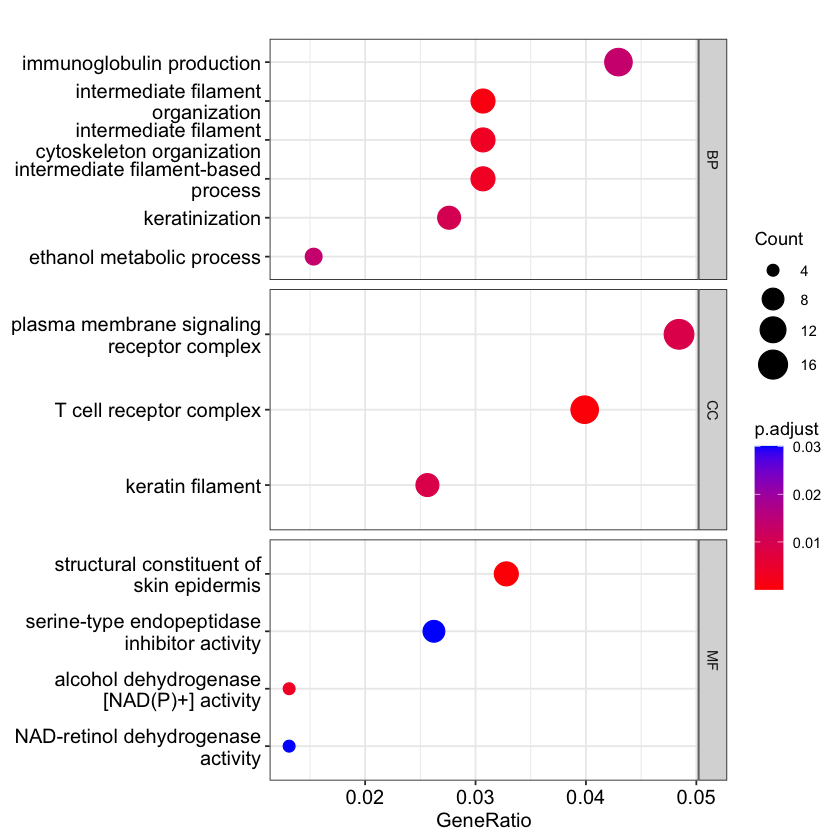

In [16]:
# goCC <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='CC',pAdjustMethod = 'BH',pvalueCutoff = 0.05, qvalueCutoff = 0.2,readable = T)
# head(goCC)
# goBP <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'BH',pvalueCutoff = 0.05, qvalueCutoff = 0.2,readable = T)
# head(goBP)
# goMF <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='MF',pAdjustMethod = 'BH',pvalueCutoff = 0.05, qvalueCutoff = 0.2,readable = T)
# head(goMF)
goALL <- enrichGO(genes_all_types$ENTREZID,OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, qvalueCutoff = 0.2,readable = T)
head(goALL)



# dotplot(goALL, showCategory=20)#气泡图

dotplot(goALL, split="ONTOLOGY")+ facet_grid(ONTOLOGY~.,scale="free")

In [17]:
kegg <- enrichKEGG(genes_all_types$ENTREZID, organism = 'hsa', keyType = 'kegg', pvalueCutoff = 0.05, pAdjustMethod = 'BH', minGSSize = 3, maxGSSize = 500, qvalueCutoff = 0.2, use_internal_data = FALSE)
head(kegg)

dotplot(kegg, showCategory=20) #气泡图

barplot(kegg,showCategory=20,drop=T) #柱状图

# #在pathway通路图上标记富集到的基因，会链接到KEGG官网
browseKEGG(kegg, "hsa03728") 

--> No gene can be mapped....

--> Expected input gene ID: 

--> return NULL...



NULL

ERROR: Error in (function (classes, fdef, mtable) : 函数‘dotplot’标签‘"NULL"’找不到继承方法
